In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #sets the backend of matplotlib to 'inline' backened
import seaborn as sns

UsageError: unrecognized arguments: #sets the backend of matplotlib to 'inline' backened


# 2.1 Analyzing market capital of S&P 500 Stocks

- Here we will analyze market cap of S&P 500 Stocks, along with the sector in which each stock belongs to like it, energy, finance etc.
- Note : Market cap is varying in nature and the info below provided are till 15 June 2022.

In [2]:
#market capital dataset can be found here https://stockmarketmba.com/stocksinthesp500.php
mkt_cap = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\i. hist_data\sp500_mkt_cap.csv', encoding='utf-8')

In [3]:
mkt_cap.head()

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value,Action
0,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,514,367,868,350",0.57%,24.67,6.51,37.31,Analyze
1,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,"$1,980,747,135,473",0.91%,27.34,10.29,12.16,Analyze
2,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,"$1,267,985,620,000",0.00%,59.22,2.65,9.46,Analyze
3,TSLA,Tesla Inc,Common stocks,Large cap,Consumer Discretionary,"$844,782,680,603",0.00%,100.78,13.58,24.83,Analyze
4,BRK.B,Berkshire Hathaway Inc. Class B,Common stocks,Large cap,Financials,"$633,264,115,884",0.00%,4.32,1.78,0.70,Analyze


In [4]:
#we wiill only focus on Symbol i.e stock name, Category3 which contains info about whether stock belongs to i.e.
# large cap, mid cap or small cap, Sector in which a stock belongs to and Market cap 
# because rest columns are needed for fundamental anlysis only
mkt_cap = mkt_cap[['Symbol','Description','Category3','GICS Sector','Market cap']]

- Note :
Market cap data is in descending order, means stock with highest market cap is at top index and stock with lowest market is at bottom index

In [5]:
#market cap column is in string format which contains '$' and ',' symbol,
# so we need to remove dollar and comma symboland convert it into int format
mkt_cap['Market cap'] = mkt_cap['Market cap'].apply(lambda x : int(x[1:].replace(',','')))

In [6]:
#calculating market cap weightage of individualstocks in S&P500 market cap
mkt_cap['Weightage'] = mkt_cap['Market cap']/mkt_cap['Market cap'].sum(axis=0)*100

In [7]:
#calculating cumulative market cap weightage of stocks in S&P500 market cap
mkt_cap['Cum_Weightage'] = mkt_cap['Market cap'].cumsum(axis=0)/mkt_cap['Market cap'].sum(axis=0)*100

In [9]:
mkt_cap[['Symbol','Market cap','Weightage','Cum_Weightage']].head(10)

,Symbol,Market cap,Weightage,Cum_Weightage
0,AAPL,2514367868350,7.285366,7.285366
1,MSFT,1980747135473,5.739203,13.024569
2,AMZN,1267985620000,3.673981,16.698550
3,TSLA,844782680603,2.447753,19.146303
4,BRK.B,633264115884,1.834879,20.981182
5,META,522767203446,1.514715,22.495897
6,UNH,490157135703,1.420227,23.916125
7,V,476482760000,1.380606,25.296731
8,NVDA,451250000000,1.307494,26.604225
9,JNJ,450785443043,1.306148,27.910373


<H5> Conclusion </H5>
- Apple has the highest market cap of approx 2.5 trillion, followed by Microsoft, which has the market cap of around 1.98 trillion
- The largest 10 companies comprises of approx 28 % of total market cap of S&P500 Index values, which consist of companies like Apple, Microsoft, Amazon, Tesla, Meta etc. 

In [10]:
#renaming column for convention
mkt_cap.rename(columns = {'GICS Sector' : 'Sector'}, inplace = True)

In [11]:
mkt_cap['Sector'].unique()

array(['Information Technology', 'Consumer Discretionary', 'Financials',
       'Communication Services', 'Health Care', 'Energy',
       'Consumer Staples', 'Industrials', 'Utilities', 'Materials',
       'Real Estate', 'Information technology'], dtype=object)

<h5> Conclusion: </h5>
- Infornation Technology and Infornation technology are same thing, so need to be merged into single group

In [12]:
#renaming sector for convention
mkt_cap['Sector'] = mkt_cap['Sector'].apply(lambda x : 'Information Technology' if x == 'Information technology' else x)

In [13]:
mkt_cap['Sector'].unique()

array(['Information Technology', 'Consumer Discretionary', 'Financials',
       'Communication Services', 'Health Care', 'Energy',
       'Consumer Staples', 'Industrials', 'Utilities', 'Materials',
       'Real Estate'], dtype=object)

<h5> Conclusion: </h5>
- Now, all sector names are unique.

# 2.1.1 Analyzing weightage of each sector in S&P 500 index Market cap

Sector
Communication Services     6.034831
Consumer Discretionary    12.247272
Consumer Staples           7.598876
Energy                     4.099121
Financials                11.265250
Health Care               14.514844
Industrials                7.887780
Information Technology    28.220628
Materials                  2.513314
Real Estate                2.817738
Utilities                  2.800348
Name: Market cap, dtype: float64


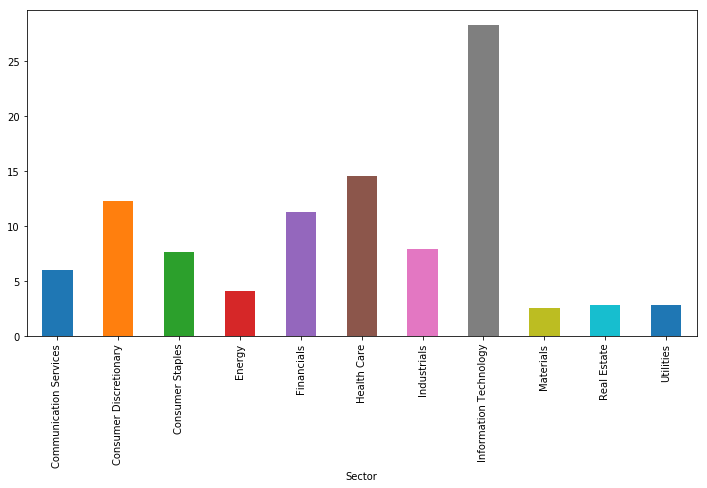

In [15]:
sector_cap = mkt_cap.groupby('Sector')['Market cap'].sum()
sector_weight = sector_cap/mkt_cap['Market cap'].sum() * 100
print(sector_weight)
sector_weight.plot(kind = 'bar', figsize = (12,6))


Conclusion :
    
- From the above plot we can conclude that, Information Technology sector's contribution in S&P 500 index is very high with around   28.220628% of total S&P500 market cap.

- We will be focussing a lot on IT, Financials and Energy sector from now onwards whose combined contribution in S& 500   market cap is app. 43.5%

In [16]:
#let's filter out stocks of IT, Energy and Financials
option_sect = ['Information Technology','Financials', 'Energy']

#data_itef means stocks from it, energy and finance sectors only
data_itef = mkt_cap[mkt_cap["Sector"].isin(option_sect)]
len(data_itef['Symbol'].unique())

163

- That means, we will focus only on 163 stocks out of 500, which belong to 3 major sector i.e IT, Energy and Finance, because it is will be very hard for us to analysse all S&P500 stocks which has 500 stocks.

In [17]:
#itef mean dataframe containing data about it, energy and fin stocks
itef_weightage = data_itef['Market cap'].sum() / mkt_cap['Market cap'].sum()*100
print('Wightage of IT, Energy and Finance in &P 500 :', itef_weightage,'%')

Wightage of IT, Energy and Finance in &P 500 : 43.58499852532612 %


In [18]:
#lets rename these 3 sectors for ease of convention
data_itef['Sector'] = data_itef['Sector'].apply(lambda x : 'IT' if x == "Information Technology" else 'E' if x == 'Energy' else 'F')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#data_it means stocks from it sector only
data_it = data_itef[data_itef['Sector'] == 'IT']

#data_e means stocks from energy sector only
data_e = data_itef[data_itef['Sector'] == 'E']

#data_f means stocks from finance sector only
data_f = data_itef[data_itef['Sector'] == 'F']

In [22]:
#stocks with maximum market capital in each sector
data_itef[data_itef['Market cap'].isin(data_itef.groupby(['Sector'])['Market cap'].max())]

,Symbol,Description,Category3,Sector,Market cap,Weightage,Cum_Weightage
0,AAPL,Apple Inc,Large cap,IT,2514367868350,7.285366,7.285366
4,BRK.B,Berkshire Hathaway Inc. Class B,Large cap,F,633264115884,1.834879,20.981182
10,XOM,Exxon Mobil Corp,Large cap,E,369650668959,1.071061,28.981434


<h5> Conclusion </h5>
- Apple Inc has highest market cap of 2.35 Trllion dollars, while BRK has 633 billion dollars, and XOM has market cap 369 billion dollars which are highest in their respective sectori.e IT, Energy & Finance

In [23]:
 #stocks with minimum market capital in each sector
data_itef[data_itef['Market cap'].isin(data_itef.groupby('Sector')['Market cap'].min())]

,Symbol,Description,Category3,Sector,Market cap,Weightage,Cum_Weightage
445,APA,Apache Corp,Large cap,E,11259756995,0.032625,98.550751
492,IVZ,Invesco Ltd,Mid cap,F,7817337059,0.022651,99.823517
496,DXC,DXC Technology Company,Mid cap,IT,7181307128,0.020808,99.910415


<h5> Conclusion </h5>
- Apache Corp has market cap of 11.2 billion dollars, IVZ has 7.8 billion dollars and DXC has 7.18 billion dollars which are lowest in their respective sectors

<H1> 2.2 Analyzing S&P 500 Index

<H2> HOW S&P 500 Index  is calculated ?</H2>

The value of the S&P 500 Index is computed by a free-float market capitalization-weighted methodology.


This is the method used by most of the world's leading indexes.

<H3>Steps to calculate S&P 500 Index: </H3>

<H4> STEP 1 : Compute the free-float market capitalization of each component in the index. </H4>
The free-float market cap is the sum total of all shares of a stock that are currently available in the market.

Fee Float Market cap = Pi * Qi

Pi = Current Stck price of a company

Qi = Number of share publically available for trading(excluding insider's, promoters, government's shares)



<H4> Step 2 : Calculating Market Weights </H4>
The market capitalizations for all constituent stocks are summed to obtain the total market capitalization of the S&P 500.

This value is used as the numerator in the index calculation.

Index level = Σ Pi * Qi / Divisor
              
              Σ Pi * Qi = Total Fee Float Market cap of constituent stocks
              Divisor = Normalising factor,
The divisor is a proprietary value that can change with stock splits, special dividends, spinoffs, and other variables that could affect the index’s value.

In [24]:
#this dataset contains the index value of S&P 500 
sp500_ind = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\i. hist_data\sp500_ind.csv',encoding='utf-8')

In [25]:
sp500_ind.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [26]:
sp500_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
Ticker       1259 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 78.8+ KB


- Date column is in object fmt, need to be converted into date time fmt

In [29]:
# Since, date column is of object type, we need to convert it into Datetime type
sp500_ind['Date'] = pd.to_datetime(sp500_ind['Date'])

In [30]:
sp500_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
Date         1259 non-null datetime64[ns]
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
Ticker       1259 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 78.8+ KB


- Now date column is converted into datetime fmt

In [31]:
sp500_ind.Date.max()

Timestamp('2022-06-14 00:00:00')

In [32]:
sp500_ind.Date.min()

Timestamp('2017-06-15 00:00:00')

<h5> Conclusion </h5>
- Range of data is  '2017-06-15' - '2022-06-14'

- Since, this data is time series , we need to make our date column as index, because analysis become very easy and processing time also decreases drastically.

In [33]:
sp500_ind.set_index('Date',drop = True,inplace = True)

In [34]:
sp500_ind.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,2432.459961,3353050000,SP500_Ind
2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,2433.149902,5284720000,SP500_Ind
2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,2453.459961,3264700000,SP500_Ind
2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,2437.030029,3416510000,SP500_Ind
2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,2435.610107,3594820000,SP500_Ind


<h3> Plotting the S&P500 time series data </h3>

- A time-series dataset does not make sense to us until we plot it.

- Plotting a time series helps us actually see if there is a trend, a seasonal cycle, outliers, and more. It gives us a feel for the data

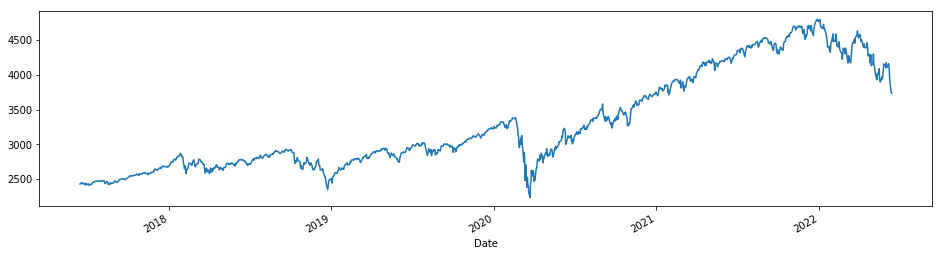

In [35]:
sp500_ind['Close'].plot(figsize=(16,4))

<H5>Conclusion: </H5>

- We can see that there is a sharp decline in Index value in the first quarter of 2020. We need to zoom into this range, to get more clearer picture

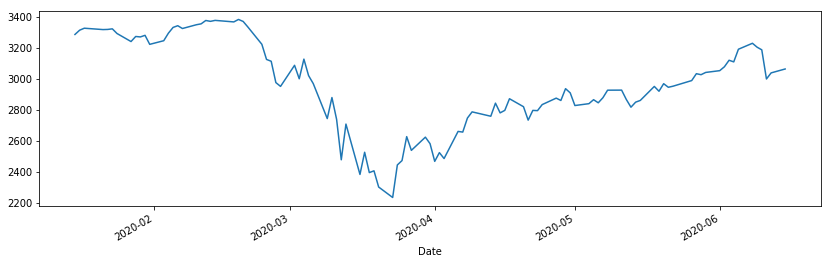

In [36]:
sp500_ind['Close']['2020-01-15' : '2020-06-15'].plot(figsize=(14,4))

<H5> Conclusion : </H5>

- The index value declined sharply from 3300 to 2250, after analyzing the external sources we came to know that at that time,
the whole market was hit very badly due to covid and almost every stock price went to correction of about 30% from mid-February to mid-March

- But soon after that, stock market started rising again, and S&P hits the all time high in Jan of 2022

- After going through some extra source of information https://www.vox.com/business-and-finance/22421417/stock-market-pandemic-economy, we came to know that the Federal Reserve took extraordinary measures to support financial markets  US government pumped trillions of dollars into the economy across multiple relief bills. Turns out giving people money is good for markets, too. And with bond yields so low, investors didn’t really have a more lucrative place to put their money. <H6>And one most important point to note here is that while stock market was pumping, GDP of US was still going through worst phase in history, and in 2nd quarter of 2020 i.e. July 2020, it reached -31.2 which is lowest in history since 1950</H6>

- To put it plainly, the stock market is not representative of the whole economy.

<h2>Time Series Decomposition</h2>

In time series analysis for forecasting new values, it is very important to know about the past data. More formally, we can say it is very important to know about the patterns which are followed by the values with time. There can be many reasons which cause our forecasted values to fall in the wrong direction. Basically, a time series consists of four components. Variation of those components causes the change in the pattern of the time series. These components are:

- <b>Level</b>: It is the main value that goes on average with time.


- <b>Trend</b>: The trend is the value that causes increasing or decreasing patterns in a time series.


- <b>Seasonality</b>: This is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series.


- <b>Noise</b>: These are the random variations in the time series.

    
The combination of those components with time causes the formation of a time series. Most time series consists of the level and 
noise/residual and the trend or seasonality are the optional values. They may take part or they may not. 

We will use Multiplicative time series decomposition instead of additive because this series is not stationery

-                <b>y(t) = Level × Trend × seasonality × Noise</b>

In [37]:
import statsmodels.api as sm

In [38]:
sp_series = sp500_ind[['Close']]

<h3>a. Yearly seasonality</h3>

In [39]:
yr_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 252)

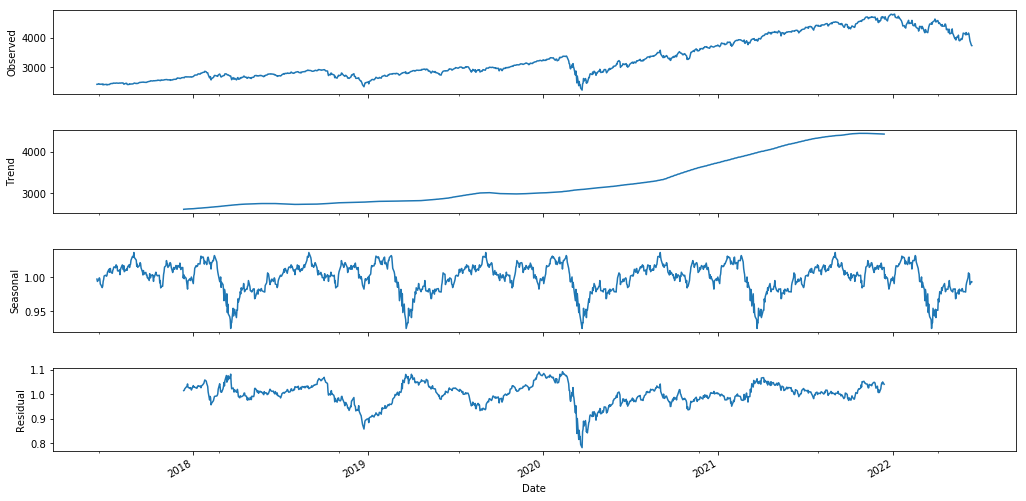

In [40]:
fig = yr_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- Clearly there is a uptrend in time S&P 500 index from 2018 to 2022.
- But there is no clear pattern of seasonality, as it ranges from 0.9 to 1.1, while S&P500 index value is very high which ranges from 3000 - 5000
- But the residual error is also high as and comparable to seasonal data, and also, it is non gaussian which is expected.

In [41]:
half_yr_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 176) #multiplicative instead of additive because this series is not stationery

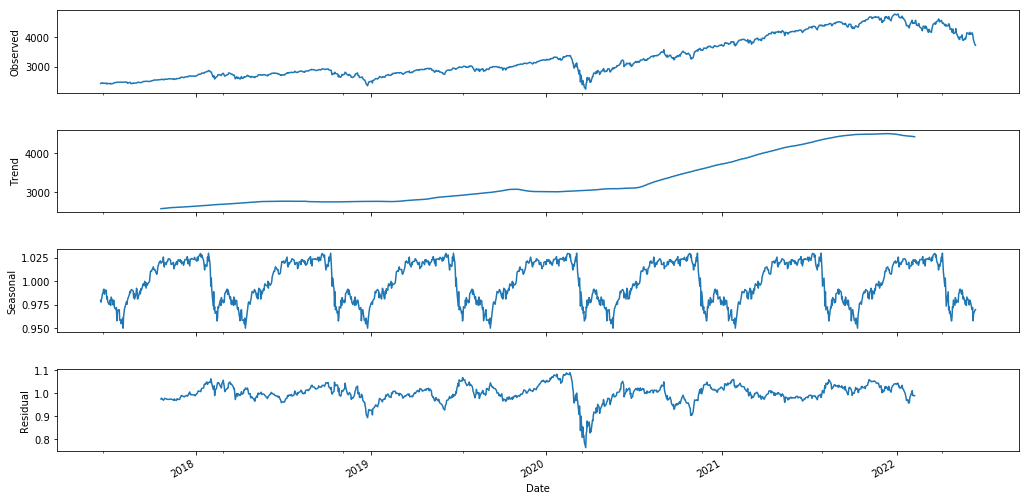

In [42]:
fig = half_yr_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- Clearly there is a uptrend in time S&P 500 index from 2018 to 2022.
- But there is no clear pattern of seasonality, as it ranges from 0.95 to 1.025, while S&P500 index value is very high which ranges from 3000 - 5000
- But the residual error is also high as and comparable to seasonal data, and also, it is non gaussian which is expected.

<h3>c. Monthly Seasonality</h3>

In [43]:
mn_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 21) #multiplicative instead of additive because this

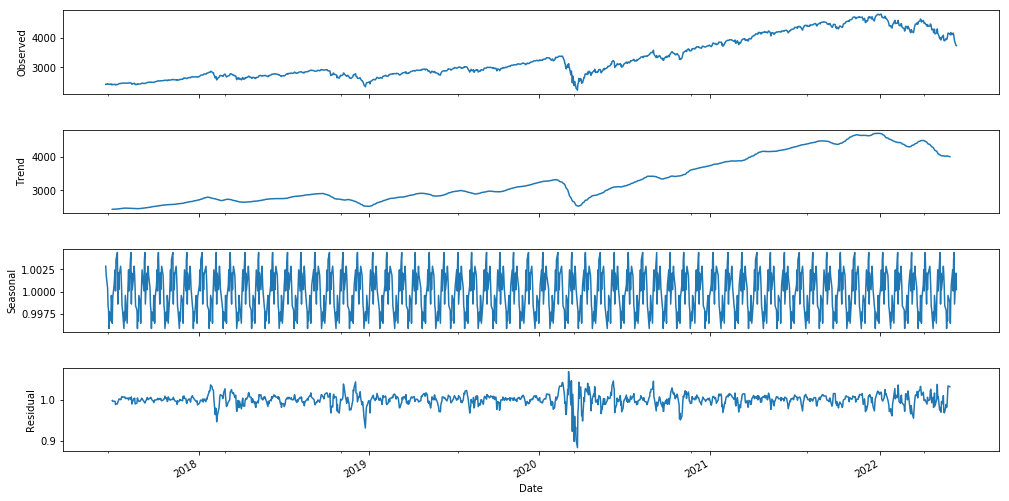

In [44]:
fig = mn_seas.plot();
fig.set_size_inches((16, 8))
plt.show()

<h5> Conclusion </h5>
- Overall there is a uptrend, but there is alos volatility in the middle of this time series from 2018 to 2022.
- But there is no clear pattern of seasonality, as it ranges from 0.9 to 1.1, while S&P500 index value is very high which ranges from 3000 - 5000
- But the residual error is also high as and comparable to seasonal data, but the error dist is also non gaussian dist which is expected.

<h3>d. Weekly Seasonality</h3>

In [47]:
weak_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 5) #multiplicative instead of additive because this series is not stationer

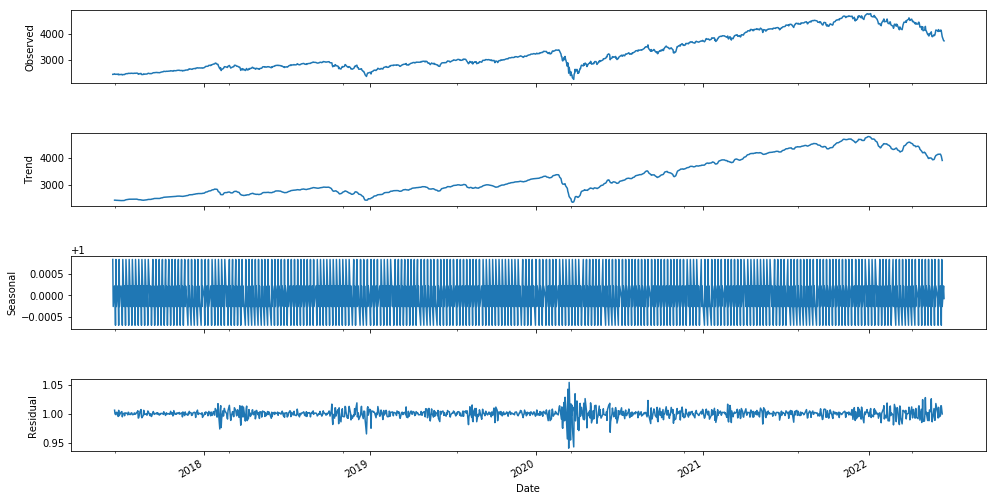

In [48]:
fig = weak_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- From the above plot we can see that as we decrease the time period in seasonal decomposition, residual error decreases but the volatility in trend also increases.
- Year Mid Feb - Mid Mrach 2020 is an exception , where covid hits the global market very badly.
- In weakly seasonal data, we get minimum residual error with random gaussian in nature.

<H2> 2.2.1. Applying Resampling on S&P500 index value </H2>

<H3> What is RESAPLING and why it is needed? </H3>

Resampling is necessary when you’re given a data set recorded in some time interval and you want to change the time interval

to something else. For example, you could aggregate weekly, monthly data, yearly data, or you could upsample hourly data into 

minute-by-minute data.

There are two kinds resampling:

<H4> 1.Downsampling — Resample to a wider time frame (from months to years)</H4>

This is fairly straightforward in that it can use all the groupby aggregate functions including mean(), min(), max(), sum() and so forth.
In downsampling, your total number of rows goes down.

<H4>2. Upsampling </H4>

It's not simply inverse of downsampling, it's like getting some information for free. Filling empty values with technique like imputation and interpolation are few examples

<H5> 1 a. Monthly Closing Price </H5>

In [49]:
#max closing price in every month
monthly_max = sp500_ind['Close'].resample(rule='M').max().reset_index()

#min closing price in every month
monthly_min = sp500_ind['Close'].resample(rule='M').min().reset_index()

[]

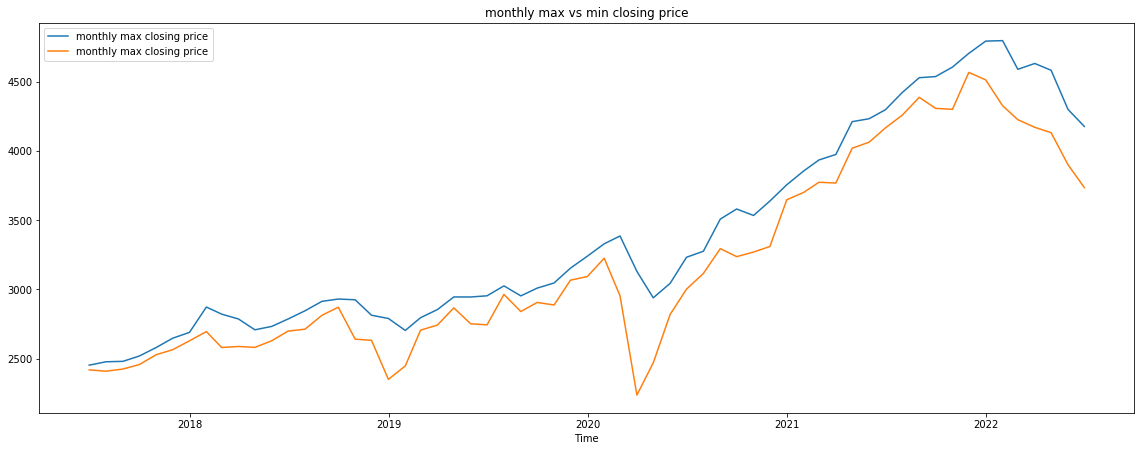

In [50]:
plt.figure(figsize = (16,6))
plt.plot(monthly_max['Date'],monthly_max['Close'],label = 'monthly max closing price')
plt.plot(monthly_min['Date'],monthly_min['Close'],label = 'monthly max closing price')
plt.tight_layout()
plt.xlabel('Time')
plt.title('monthly max vs min closing price')
plt.legend()
plt.plot()

<H3> Conclusion </H3>
- There is a significance change in min and max value in  a month at the end of every year
- In the feb-mar of 2020, there is a very high gab in min and max value of S&P500 Index value.

<H5> 1 b. Weekly Closing Price </H5>

In [51]:
week_max = sp500_ind['Close'].resample(rule='W-MON').max().reset_index()
week_min = sp500_ind['Close'].resample(rule='W-MON').min().reset_index()

[]

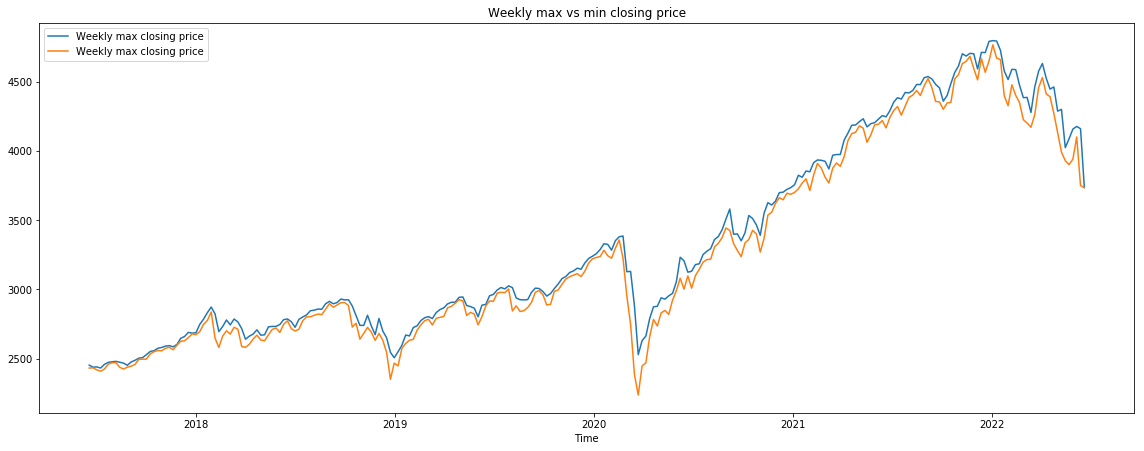

In [52]:
plt.figure(figsize = (16,6))
plt.plot(week_max['Date'],week_max['Close'],label = 'Weekly max closing price')
plt.plot(week_min['Date'],week_min['Close'],label = 'Weekly max closing price')
plt.tight_layout()
plt.xlabel('Time')
plt.title('Weekly max vs min closing price')
plt.legend()
plt.plot()

<H5> Conclusion </H5>
- As we move from monthly closing price to weekly closing price, the gab between max and min value of S&P500 index value decreased drastically, which suggest us to focus more on weekly data as compared to monthly data in future for forecasting.
- There is only point (at the end of Q1 0f 2020) where there is a significant difference in closing price in a week. Again we will zoom into this

[]

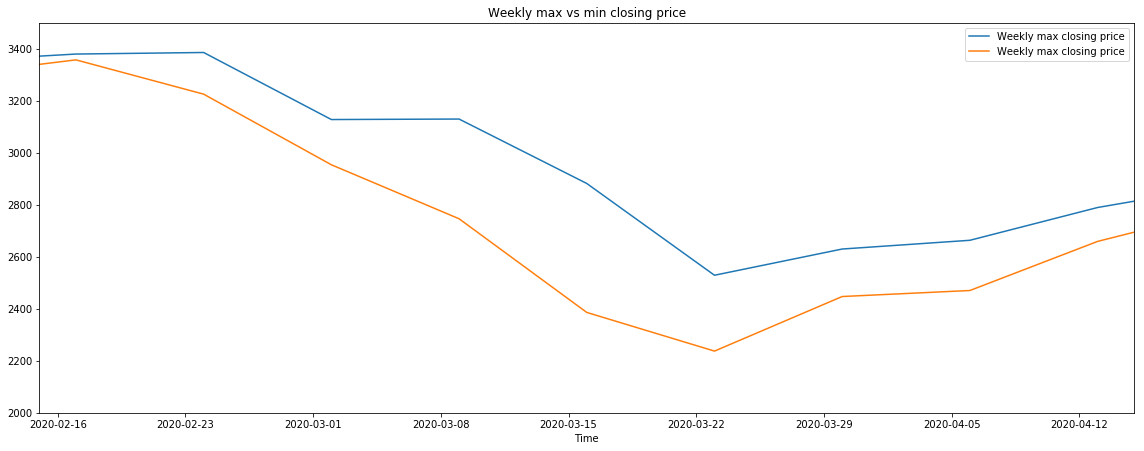

In [53]:
plt.figure(figsize = (16,6))
plt.plot(week_max['Date'],week_max['Close'],  label = 'Weekly max closing price')
plt.plot(week_min['Date'],week_min['Close'],  label = 'Weekly max closing price')
plt.tight_layout()
plt.xlim(['2020-02-15','2020-04-15'])
plt.ylim(2000,3500)
plt.xlabel('Time')
plt.title('Weekly max vs min closing price')
plt.legend()
plt.plot()

<H5> Conclusion </H5>

- The price difference between max and min price in 3rd week of 2020 was very significance, and point to be noted on <B> 15th March  2020</B>, lockdown was declared in US due to COVID outbreak which caused the sudden decline of all stock prices.

<H1>2.3 Analyzing Volume and closing price of stocks from IT, Finance and Energy sectors</H1>

In [54]:
stock_data = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\i. hist_data\sp500_list.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
stock_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,0,2017-06-15,209.5,211.32,209.440002,211.289993,180.487473,1594100.0,MMM
1,1,2017-06-16,211.73,213.46,211.440002,213.240005,182.153229,3420600.0,MMM
2,2,2017-06-19,214,214,212.699997,213.360001,182.255722,1667600.0,MMM
3,3,2017-06-20,213.45,214.57,213.050003,213.360001,182.255722,1531200.0,MMM
4,4,2017-06-21,214.02,214.02,212.089996,212.860001,181.828598,1812900.0,MMM


In [57]:
#the above dataset do not have sector column, so we will add sector column into this.
data_itef = pd.merge(stock_data, data_itef, left_on = ['Ticker'],
                              right_on = ['Symbol'])

In [58]:
len(data_itef['Symbol'].unique())

156

In [59]:
data_itef.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Symbol,Description,Category3,Sector,Market cap,Weightage,Cum_Weightage
0,5036,2017-06-15,126.28,127.36,124.500000,127.029999,117.570839,2196300.0,ACN,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427,45.429972
1,5037,2017-06-16,127.52,128,126.529999,127.559998,118.061363,2965400.0,ACN,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427,45.429972
2,5038,2017-06-19,128.47,128.47,127.389999,127.769997,118.255745,2123000.0,ACN,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427,45.429972
3,5039,2017-06-20,127.33,127.64,126.379997,126.529999,117.108070,2356400.0,ACN,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427,45.429972
4,5040,2017-06-21,127.07,127.18,126.029999,127.110001,117.644890,3257900.0,ACN,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427,45.429972


In [61]:
#dropping extra columns which are not necessery for our analysis
data_itef=data_itef.drop(['Unnamed: 0','Symbol','Open','High','Low','Adj Close','Cum_Weightage'], axis =1)


In [62]:
data_itef.head()

,Date,Close,Volume,Ticker,Description,Category3,Sector,Market cap,Weightage
0,2017-06-15,127.029999,2196300.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
1,2017-06-16,127.559998,2965400.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
2,2017-06-19,127.769997,2123000.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
3,2017-06-20,126.529999,2356400.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
4,2017-06-21,127.110001,3257900.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427


<h5>Conclusion</h5>
- Now we have dropped extra columns and will focus on those columns only which are required for our analysis

- Since, this data is time series , we need to make our date column as index, because analysis become very easy and processing time also decreases drastically.

In [64]:
data_itef['Date'] = pd.to_datetime(data_itef['Date'])


In [65]:
data_itef.head()

,Date,Close,Volume,Ticker,Description,Category3,Sector,Market cap,Weightage
0,2017-06-15,127.029999,2196300.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
1,2017-06-16,127.559998,2965400.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
2,2017-06-19,127.769997,2123000.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
3,2017-06-20,126.529999,2356400.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427
4,2017-06-21,127.110001,3257900.0,ACN,Accenture Plc Class A,Large cap,IT,191292869403,0.55427


In [66]:
#storing the merged data from S&5 500 stocks fromIT,E & F Sectors combined with the market cap data 
data_itef.to_csv(r'C:\Users\DELL\Desktop\Final Project\phase 2\data_itef.csv',index=True, encoding='utf-8')

In [67]:
data_itef = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\phase 2\data_itef.csv')

In [70]:
data_itef['Date'] = pd.to_datetime(data_itef['Date'])

In [71]:
data_itef.set_index('Date',drop = True,inplace = True)

<H2> 2.3 Analyzing Volume </H2>
<H3>2.3.1 Analyzing mean volume of 3 sectors (IT, E, F) stocks</H3>

In [72]:
#calculating total volume of each stock traded in past 5 years
tot_vol_per_stock = data_itef.groupby(['Sector','Ticker'])['Volume'].sum().reset_index()

In [74]:
tot_vol_per_stock

,Sector,Ticker,Volume
0,E,APA,9.531583e+09
1,E,BKR,8.234951e+09
2,E,COP,9.859982e+09
3,E,CTRA,9.130381e+09
4,E,CVX,1.109572e+10
5,E,DVN,1.117802e+10
6,E,EOG,5.256778e+09
7,E,FANG,3.029992e+09
8,E,HAL,1.527154e+10
9,E,HES,3.923346e+09


<h5>Conclusion</h5>
- Total volume of each stock from IT, Energy & Finance Sectors traded in past 5 years

In [75]:
#calculating weightage of each stock in total volume of all stocks
tot_vol_per_stock['Weightage'] = (tot_vol_per_stock['Volume']/tot_vol_per_stock['Volume'].sum()) * 100

In [80]:
tot_vol_per_stock = tot_vol_per_stock.sort_values(by=['Weightage'],ascending = False)

In [81]:
#calculating cumulative trading volume weightage of stocks from IT, Energy & Finance Sectors.
tot_vol_per_stock['Cum_Weightage'] = tot_vol_per_stock['Weightage'].cumsum(axis=0)/tot_vol_per_stock['Weightage'].sum(axis=0)*100

In [83]:
tot_vol_per_stock.head(10)

,Sector,Ticker,Volume,Weightage,Cum_Weightage
83,IT,AAPL,1.508589e+11,11.682038,11.682038
91,IT,AMD,8.699852e+10,6.736890,18.418927
29,F,BAC,7.557485e+10,5.852277,24.271204
133,IT,NVDA,6.165562e+10,4.774415,29.045619
127,IT,MSFT,3.719040e+10,2.879906,31.925526
116,IT,INTC,3.584792e+10,2.775949,34.701475
129,IT,MU,3.540680e+10,2.741790,37.443266
80,F,WFC,3.397599e+10,2.630993,40.074258
101,IT,CSCO,2.791402e+10,2.161573,42.235832
20,E,XOM,2.461184e+10,1.905862,44.141694


<h5> Conclusion </h5>
- Top 10 Stocks contribute to 44.14% of total volume of IT, E & F Sector stocks.
- Out of top 10, 7 stocks belong to IT Sector only, which suggest that IT Stocks are traded with highe volumes
- Apple. AMD, BAC, NVDA Microsoft are few among the top traded stocks in recent 5 years

In [84]:
#first we will aggregate the volume of stocks sectorwise per day 
vol_itef = data_itef.groupby(['Date','Sector'])['Volume'].mean().reset_index()
vol_itef.set_index('Date', drop = True, inplace = True)

In [85]:
#let's filter out vol of each sector stocks
vol_it= vol_itef[vol_itef['Sector'] == 'IT']
vol_e= vol_itef[vol_itef['Sector'] == 'E']
vol_f= vol_itef[vol_itef['Sector'] == 'F']

In [86]:
vol_it.head()

,Sector,Volume
Date,,
2017-06-15,IT,8.229068e+06
2017-06-16,IT,1.136557e+07
2017-06-19,IT,7.571103e+06
2017-06-20,IT,8.425598e+06
2017-06-21,IT,9.104484e+06


<h5> Conclusion </h5>
- Volume of IT Sector per day.

<H3> Applying reasmpling to analyze monthly mean volume of each sector</H3>

In [88]:
#vol_it_m = mean volume of it stock per month
vol_it_m = vol_it['Volume'].resample(rule = 'M').mean()

#vol_e_m = mean volume of energy stock per month
vol_e_m = vol_e['Volume'].resample(rule = 'M').mean()

#vol_f_m = mean volume of finance stock per month
vol_f_m = vol_f['Volume'].resample(rule = 'M').mean()

[]

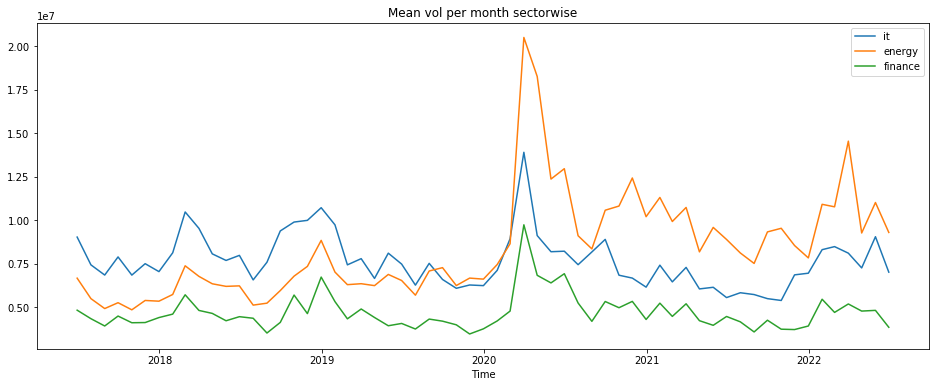

In [89]:
plt.figure(figsize = (16,6))
plt.plot( vol_it_m,label = 'it')
plt.plot( vol_e_m,label = 'energy')
plt.plot( vol_f_m,label = 'finance')
plt.xlabel('Time')
plt.title('Mean vol per month sectorwise')
plt.legend()
plt.plot()

<H4>Conclusion :</H4>
    
- Volume of IT sector stocks are relatively higher than those of energy and finance
